In [129]:
# Import required packages
# Working with multidimensional number arrays
import numpy as np
# Plotting
from matplotlib import pyplot as plt
import pandas as pd

In [130]:
df = pd.read_csv("iris.data", header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [131]:
# with open python method that helps to open text files
# https://note.nkmk.me/en/python-file-io-open-with/

# rt means to read a text file where r stands for read and t for text file
with open("iris.names", "rt") as file:
    content = file.read()
    print(content)

1. Title: Iris Plants Database
	Updated Sept 21 by C.Blake - Added discrepency information

2. Sources:
     (a) Creator: R.A. Fisher
     (b) Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
     (c) Date: July, 1988

3. Past Usage:
   - Publications: too many to mention!!!  Here are a few.
   1. Fisher,R.A. "The use of multiple measurements in taxonomic problems"
      Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions
      to Mathematical Statistics" (John Wiley, NY, 1950).
   2. Duda,R.O., & Hart,P.E. (1973) Pattern Classification and Scene Analysis.
      (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.
   3. Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System
      Structure and Classification Rule for Recognition in Partially Exposed
      Environments".  IEEE Transactions on Pattern Analysis and Machine
      Intelligence, Vol. PAMI-2, No. 1, 67-71.
      -- Results:
         -- very low misclassification rates (0% for t

Labelling columns with appropriate names based on the information in the iris.names folder that was opened above.

In [132]:
feature_names = ["sepal_length_(cm)", "sepal_width_(cm)", "petal_length_(cm)", "petal_width_(cm)"]
df.columns = feature_names + ["class"]
df.head()

,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width_(cm),class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


https://note.nkmk.me/en/python-pandas-str-replace-strip-etc/

In [133]:
# Cleaning the df
df["class"] = df["class"].str.replace("Iris-", "")
df.head()

,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width_(cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Calculate summary statistics
See https://numpy.org/doc/stable//reference/routines.statistics.html to calculate mean, standard deviation, minima, maxima and median

Read https://docs.python.org/3/library/functions.html about built-in python round() function which is used to round numbers.

See https://www.w3schools.com/python/ref_string_replace.asp to replace a certain value in a string with another value

See https://numpy.org/doc/2.1/reference/generated/numpy.empty.html to create an empty numpy array

See https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html to working with pandas df

See https://www.geeksforgeeks.org/enumerate-in-python/ to read about enumerate() function which allows to track the number of for loop iterations

Convert pandas df to numpy
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html

Transpose numpy array
https://numpy.org/doc/2.2/reference/generated/numpy.transpose.html

In [134]:
# Define a function that computes summary statistics using the numpy
def summary_statistics(iris_data, feature_names):
    
    
    # Obtain the feature names
    feature_names = iris_data.columns
    
    # Convert pandas df to numpy array
    iris_data = iris_data.to_numpy()
    # Transpose the iris dataset to separate all values for each feature in a separate list
    iris_data = np.transpose(iris_data)
    
    
    # Create an empty pandas dataframe 
    df = pd.DataFrame(np.empty((4,5)))
    # Set the index of df as feature names
    df.index = feature_names
    # Set the column names of df 
    df.columns = ["mean", "std", "minima", "maxima", "median"]
    
    # Go through each feature in the iris_transposed
    # and calculate summary statistics
    # Use enumerate() function to loop through the object
    # enumerate() outputs the # of iterations and values from the object
    for count, feature in enumerate(iris_data):
        df.loc[feature_names[count], "mean"] = round(np.mean(feature), 2) # Compute mean
        df.loc[feature_names[count], "std"] = round(np.std(feature), 2) # Compute standard deviation
        df.loc[feature_names[count], "minima"] = round(np.min(feature), 2) # Compute the minimum
        df.loc[feature_names[count], "maxima"] = round(np.max(feature), 2) # Compute the maxima
        df.loc[feature_names[count], "median"] = round(np.median(feature), 2) # Compute the median

    return df

In [135]:
sum_stats = summary_statistics(df.iloc[:,:4], feature_names)
sum_stats

,mean,std,minima,maxima,median
sepal_length_(cm),5.84,0.83,4.3,7.9,5.80
sepal_width_(cm),3.05,0.43,2.0,4.4,3.00
petal_length_(cm),3.76,1.76,1.0,6.9,4.35
petal_width_(cm),1.20,0.76,0.1,2.5,1.30


convert pandas df to a text file
https://saturncloud.io/blog/how-to-write-a-pandas-dataframe-to-a-txt-file/#:~:text=txt%20File-,To%20write%20a%20Pandas%20dataframe%20to%20a%20.,txt

In [136]:
sum_stats.to_csv('sum_stats.txt', sep='\t', index=True)

make all letters lower case
https://zerotomastery.io/blog/python-lowercase/#:~:text=The%20lower()%20method%20is%20a%20built%2Din%20function%20in,string%20with%20the%20changes%20applied.

In [137]:
# Convert pandas df to numpy array
iris_data = df.iloc[:,:4].to_numpy()
# Transpose the iris dataset to separate all values for each feature in a separate list
iris_data = np.transpose(iris_data)
iris_data[1]

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
       3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.1, 3. ,
       3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3. , 3.8, 3.2, 3.7, 3.3, 3.2, 3.2,
       3.1, 2.3, 2.8, 2.8, 3.3, 2.4, 2.9, 2.7, 2. , 3. , 2.2, 2.9, 2.9,
       3.1, 3. , 2.7, 2.2, 2.5, 3.2, 2.8, 2.5, 2.8, 2.9, 3. , 2.8, 3. ,
       2.9, 2.6, 2.4, 2.4, 2.7, 2.7, 3. , 3.4, 3.1, 2.3, 3. , 2.5, 2.6,
       3. , 2.6, 2.3, 2.7, 3. , 2.9, 2.9, 2.5, 2.8, 3.3, 2.7, 3. , 2.9,
       3. , 3. , 2.5, 2.9, 2.5, 3.6, 3.2, 2.7, 3. , 2.5, 2.8, 3.2, 3. ,
       3.8, 2.6, 2.2, 3.2, 2.8, 2.8, 2.7, 3.3, 3.2, 2.8, 3. , 2.8, 3. ,
       2.8, 3.8, 2.8, 2.8, 2.6, 3. , 3.4, 3.1, 3. , 3.1, 3.1, 3.1, 2.7,
       3.2, 3.3, 3. , 2.5, 3. , 3.4, 3. ])

using a numpy range function
https://numpy.org/doc/2.1/reference/generated/numpy.arange.html

In [155]:
def plot_hist(data, title="",xname=""):

    # Create the axes
    fig, ax1 = plt.subplots()

    # Plot a histogram
    ax1.hist(data, bins=25, color='skyblue', edgecolor='black')
    # Plot a grid on the ax1
    ax1.grid(color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.6)
    # Set the limits for the ax1 axis
    xlimits = (round(min(data), 0), round(max(data), 0))
    ax1.set_xlim(xlimits)
    # Set the x-axis labels
    ax1.set_xlabel(title, fontsize=14)
    # Set the y-axis labels
    ax1.set_ylabel("Frequency", fontsize=14)
    # Add more ticks on the x-axis
    ax1.set_xticks(np.arange(xlimits[0], xlimits[1], 0.2))
    
        # Set the title of a figure
    plt.title(title, fontsize=16)
    # Save the figure a .png
    figure_name = title.replace(" in cm", "")
    figure_name = figure_name.replace(" ", "_")
    figure_name = figure_name.lower()
    figure_name = f"{figure_name}.png"
    
    
    plt.savefig(figure_name, dpi=300, bbox_inches = 'tight')

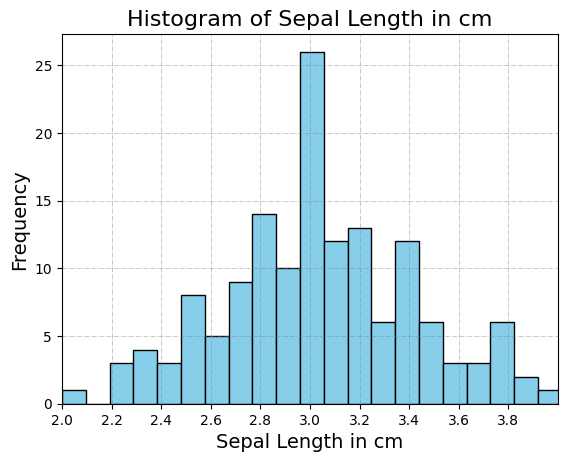

In [150]:

plot_hist(iris_data[1], title="Histogram of Sepal Length in cm", xname="Sepal length in cm")

In [157]:
temp_feature_names = [feature.replace("_", " ").capitalize() for feature in feature_names]

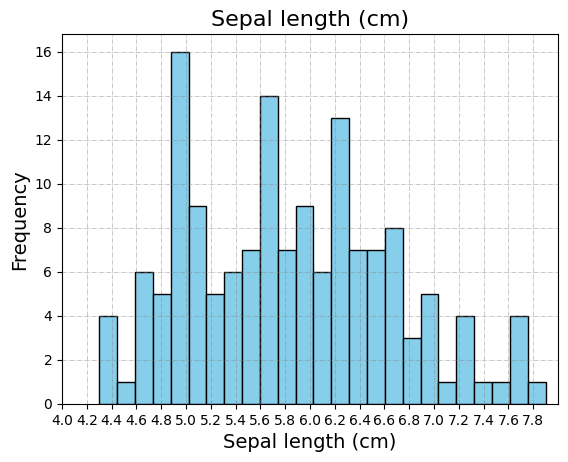

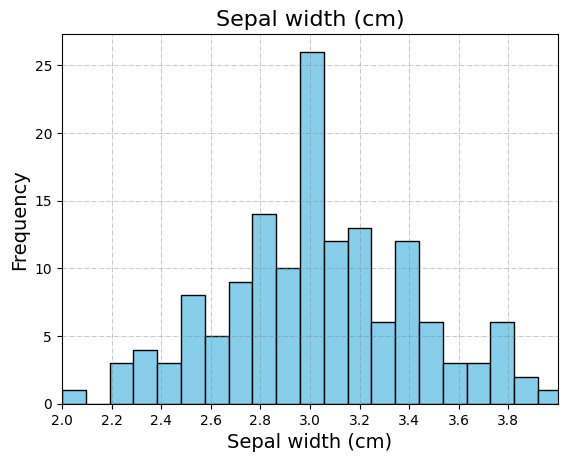

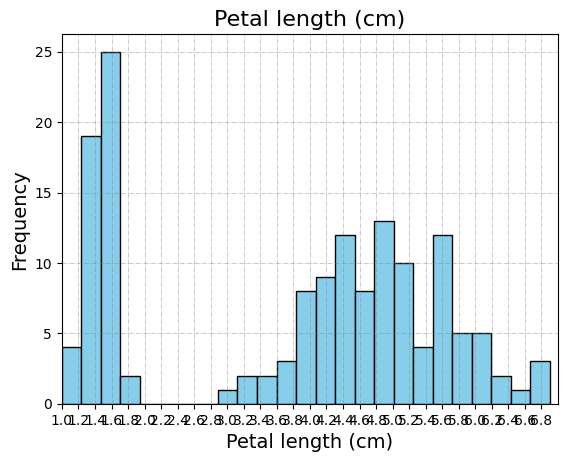

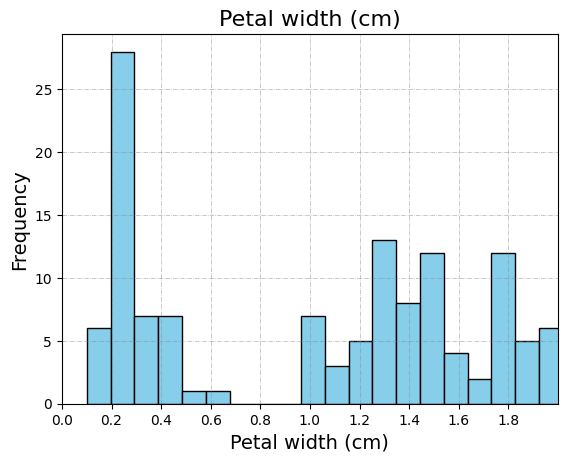

In [158]:
for i in range(4):
    plot_hist(iris_data[i], title=temp_feature_names[i])